In [1]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib

# Fetch the latest dataset

In [2]:
def fetch_data(url_path, output_path):
    if not os.path.isdir(output_path):
        os.makedirs(output_path)
    tgz_name = os.path.basename(url_path)
    tgz_path = os.path.join(output_path, tgz_name)
    urllib.request.urlretrieve(url_path, tgz_path)
    tgz_archive = tarfile.open(tgz_path)
    tgz_archive.extractall(path=output_path)
    tgz_archive.close()

In [3]:
# Local Paths
dataset_name = 'housing'
data_path = r'python_for_engineering\housing_project\data'

# HTTP Paths
url_path = f'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/{dataset_name}/'
archive_name = f'{dataset_name}.tgz'
archive_url = urllib.parse.urljoin(url_path, archive_name)

# Fetch data
fetch_data(archive_url, data_path)

# Load the CSV
housing_path = os.path.join(data_path, 'housing.csv')
housing_df = pd.read_csv(housing_path)
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


From the *info()* method, I can clearly see that all of the features except *total_bedrooms* contain all data - in total_bedrooms there are 207 missing entries and I will pay more attention to the missing values later on. The only categorical attribute is the *ocean_proximity*. In order to find out, what categories are present and how many instances belong to each category in the ocean_proximity column, method *value_counts()* is used.

In [51]:
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Brief description of a dataset is achieved using the *describe()* method.

The 25%, 50% and 75% indices present the corresponding percentiles - a percentile indicates the value below which a given percentage of observations in a group of observations falls. For example, 25% of districs have a housing_median_age lower than 18, while 50% are lower than 29, and 75% have housing_median_age below 37. The percentiles are often called the quartiles: 25th percentile (or 1st quartile), the median (not mean!), 75th percentile (3rd quartile).

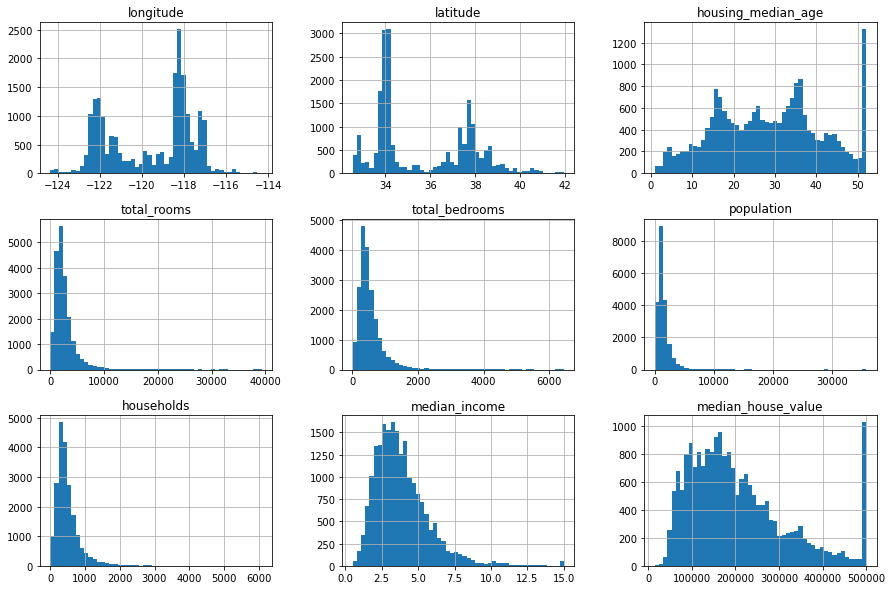

In [7]:
housing_df.hist(bins=50, figsize=(15, 10))
plt.show()

Another quick way to get a deeper insights into the type and distribution of data is to plot a histogram for each numerical attribute. Histogram shows the number of datapoints (on the vertical axis) that are in a given value range (on the horizontal axis, determined by number of bins) for a specific feature.

These histograms reveal that:
- the median income attribute does not look like it is expressed in US dollars (USD).
- the housing median age and the median house value were also limited. 
- these attributes have non-uniform scales. 
- distribution is heavily and positively skewed (left tail heavy), since they extend much farther to the right of the median than to the left (most of the datapoints are distributed on the left hand side of the graph). This may make it a bit harder for some Machine Learning algorithms to detect patterns.

# Creating a Test Dataset
## Random Sampling
The simplest option is to use the Scikit-learn's *train_test_split()* function. It is a very useful method, since multiple datasets can be passed with an identical number of rows and it will split them on the same indices - it is very useful in case of having separate DataFrame directly for labels.

**Purely random sampling** is generally fine if the dataset is large enough, especially if the dataset is relatively large to the total number of attributes. However there is a risk of **significant sampling bias**. 

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=42)

## Stratified sampling
The population is divided into homogenous subgroups called *strata* and the right number of instances is sampled from each *stratum* to guarantee, that the set is **representative** of the overall population.

In case of using the **purely random sampling**, there is 12% chance of sampling a skewed test set with either less than 49% of female or more than 54% female. Either way, the survey results would be **significantly biased**.  

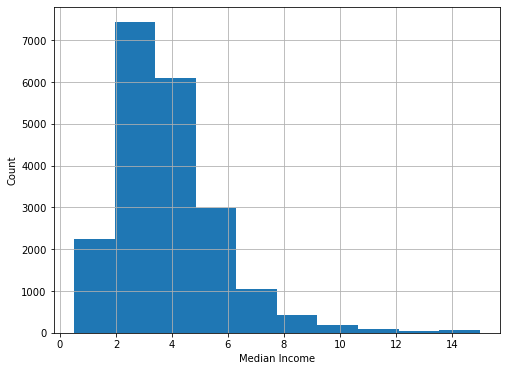

In [50]:
plt.figure(figsize=(8, 6))
housing_df['median_income'].hist(bins=10)
plt.xlabel('Median Income')
plt.ylabel('Count')
plt.show()

The median income is a very important attribute to predict the median housing prices. I need to ensure that the test set is representative of the various categories of incomes present in the feature matrix. In order to categorize people into subgroups based on their median income, I firstly analyze the distribution of *median_income* using histogram.

In [10]:
from PIL import Image

In [ ]:
Image.open(r'images/median_income_classification.png')

I can cluster all instances belonging to the *median_income* columns into 5 groups, where majority of the values is distributied in between 1-6 * 1e4 USD. It is important to have a sufficient number of instances in each stratum. In other words, there shouldn't be many strata and each each stratum should be large enough. 

In [48]:
# clustering the median income into 5 categories
housing_df['median_income_category'] = pd.cut(housing_df['median_income'],
                                    # we divide the median income 0-6 into 4 categories, therefore the step is 6/4 = 1.5
                                    # the 5th category is simply 6-inf
                                    bins=[i * 6 / 4 if i < 5 else np.inf for i in range(6)],
                                    labels=[1, 2, 3, 4, 5]).astype('int64')

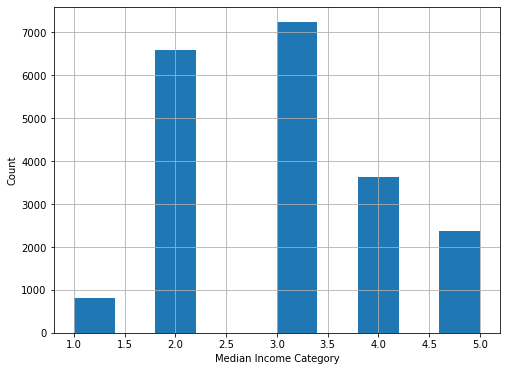

In [49]:
plt.figure(figsize=(8, 6))
housing_df['median_income_category'].hist()
plt.xlabel('Median Income Category')
plt.ylabel('Count')
plt.show()

In [122]:
from sklearn.model_selection import StratifiedShuffleSplit

dataset_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_indices, test_indices in dataset_split.split(housing_df, housing_df['median_income_category']):
    strat_train_set = housing_df.loc[train_indices]
    strat_test_set = housing_df.loc[test_indices]

# Discover and Visualize the Data
There are some good habits to follow during the dataset examination:
* Move the test set aside and do not modify it.
* If the training set is very large, a thumb rule is to sample an exploration set, to make manipulations easy and fast. 

In this case, the dataset is quite small and I will work directly on a full-dimensional **training** set. Creating a copy will ensure, that the original straitified training set will not suffer during any kind of operations.

In [123]:
train_set = strat_train_set.copy()

## Visualising Geographical Data
Since the dataset provides the geographical information about the house location (latitude and longitude), I can create a scatter plot of all districts to visualize the data.

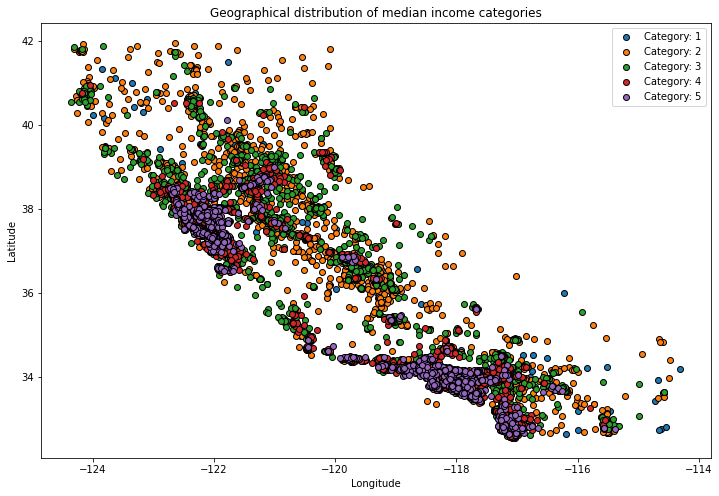

In [60]:
plt.figure(figsize=(12, 8))
for name, group in train_set.groupby('median_income_category'):
     plt.scatter(
         group.longitude, 
         group.latitude, 
         edgecolors='k',
         label=f'Category: {name}')
plt.title('Geographical distribution of median income categories')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

D:\Anaconda\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator


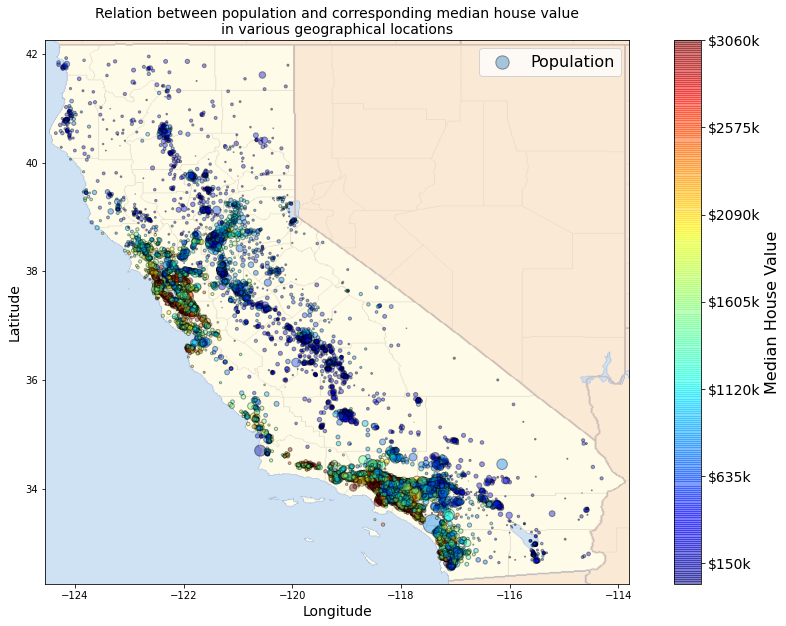

In [105]:
import matplotlib.image as mpimg
california_img = mpimg.imread('data/california.png')
ax = train_set.plot(kind='scatter',
                        x='longitude',
                        y='latitude',
                        s=train_set['population'] / 100,
                        c=train_set['median_house_value'],
                        cmap=plt.get_cmap('jet'),
                        colorbar=False,
                        figsize=(16, 10),
                        alpha=0.4,
                        label='Population',
                        edgecolors='k')

plt.imshow(california_img, 
           extent=[-124.55, -113.80, 32.25, 42.25], 
           alpha=0.5,
           cmap=plt.get_cmap('jet'))


plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

prices = train_set['median_house_value']
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(['$%dk'%(round(v / 100)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.title('Relation between population and corresponding median house value\nin various geographical locations', fontsize=14)

plt.legend(fontsize=16)
plt.show()

The graph above reveals a strong relation between the housing prices, location (distance from Ocean), and the population density. It will beneficial to use a clustering algorithm to detect the main clusters and add new features that measure the proximity to the cluster centers. The ocean proximity attribute may be useful as well, although in Nirthern California the housing prices in coastal districts are not too high, so it is not a general rule.

## Correlation
Since the dataset is not too large, I can easily compute the **Standard (Linear) Correlation Coefficient** (also called the *Pearson's r*), between every pair of attributes using the *pandas.DataFrame.corr()* method.

In [107]:
corr_matrix = train_set.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)[1:]

median_income             0.687160
median_income_category    0.642274
total_rooms               0.135097
housing_median_age        0.114110
households                0.064506
total_bedrooms            0.047689
population               -0.026920
longitude                -0.047432
latitude                 -0.142724
Name: median_house_value, dtype: float64

Another way to check for correlation between attributes is to use the *pandas.scatter_matrix*, which plots every numerical attribute against each other. I will foucs only on a few most promising features that are characterized by highest absolute correlation with the median house value.

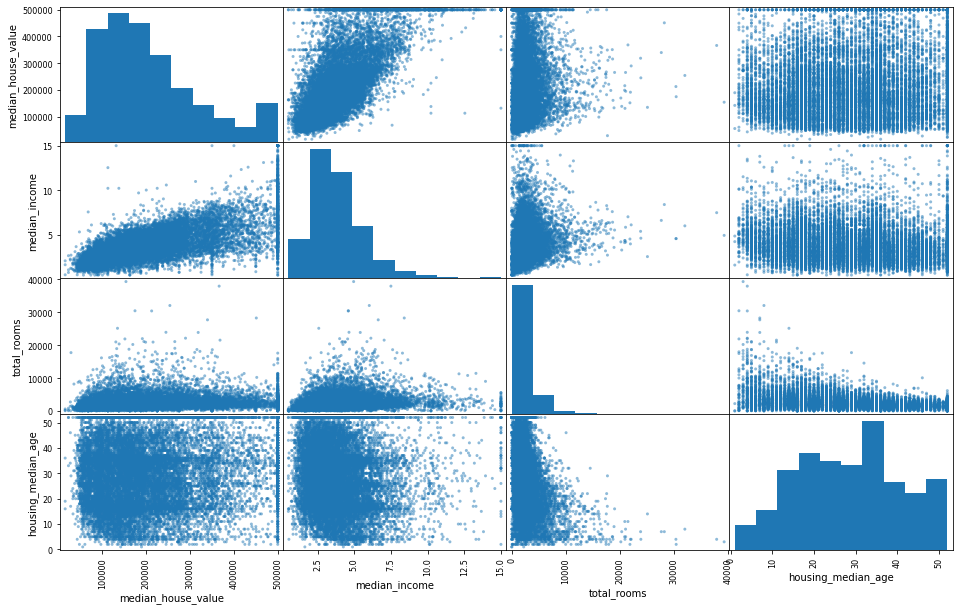

In [108]:
from pandas.plotting import scatter_matrix

features = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(train_set[features], figsize=(16, 10))
plt.show()

Along the main diagonal a histogram of each attribute is presented. As expected, the strongest influence on the *median_house_value* has *median_income*, and this relation is rather linear as observed.

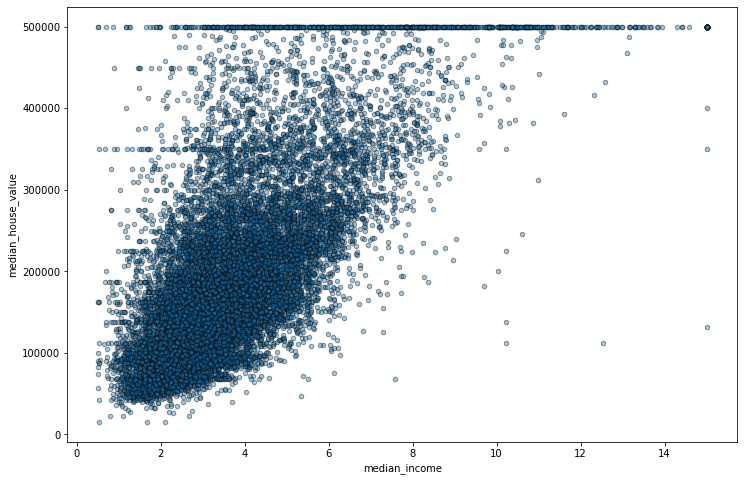

In [110]:
train_set.plot(kind='scatter',
                x='median_income',
                y='median_house_value',
                edgecolors='k',
                figsize=(12, 8),
                alpha=0.4)
plt.show()

The positive linear correlation is very strong, there is clearly an upward trend and the points are not too dispersed from the median centroid. The price cap is clearly visible as horizontal line at 500k USD. Moreover this plot reveals other less obvious straight lines: a horizontal line around 450k USD and another around 350k USD, probably around 280k USD and a few below that. A feasible preprocessing step would involve removing these outliers, since reproducing these data quirks will negatively affect the predictions.

## Examination of New Feature Combinations
All the information provided in the dataset are respectful in temrs of a district, not per capita. Total number of rooms in a district is not a useful information, however a number of rooms or bedrooms in a single household is. It may be a great choice to compare the number of bedrooms to the total number of rooms per household. The decisive factor may involve popualtion per household as well.

In [114]:
# Create new attributes - we are interested in information per household.
for col in ['total_rooms', 'population']:
    new_name = f"{col.split('_')[-1]}_per_household"
    train_set[new_name] = train_set[col] / train_set['households']
train_set['bedrooms_per_room'] = train_set['total_bedrooms'] / train_set['total_rooms']

In [117]:
corr_matrix = train_set.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)[1:]

median_income               0.687160
median_income_category      0.642274
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

As it turned out, *bedroom_per_room* is much more correlated with the *median_house_value* than *rooms_per_household* or even *total_rooms*. Obviosuly, the *rooms_per_household* is more informative than *total_rooms* as well. Consequently, the more rooms in respect to the number of bedrooms a household offers, the more expensive that household is. 

# Data Preprocessing
First things first - the target lagels have to be isolated from the predictors at the initially. The *median_income_category* has to be deleted as it increases the multicollinearity and does not provide any more relevant information than the *median_income*. It was priorly used as a reference in the stratified shuffle split to make the train a test set representative of the complete dataset.

In [174]:
train_features = strat_train_set.drop(columns=['median_house_value', 'median_income_category'], axis=1, inplace=False)
train_labels = strat_train_set['median_house_value'].copy()

## Numerical features
Some of the numerical rows have missing values, namely the total number of bedrooms. There are primarily 3 possible solutions:

1. Get rid of all corresponding districts (drop rows with missing data). If there are only a few missing values in our target data, we can use the *dataset.dropna(subset=['target_column'], axis=0, inplace=True)* to drop all of the rows in the whole dataset, in which target contains a missing value. 

2. Get rid of the lacking attribute (drop columns with missing data). *dataset.drop(columns=['total_bedrooms'], axis=1, inplace=True)* will drop selected columns from the dataset.

3. Manipulate with the missing data, for example NaNs can be set explicitly to some values like zero, mean or median. *dataset['total_bedrooms'].fillna(value)*

Scikit-learn provides special classes for implementation of high-end data cleaning facilities.

In [173]:
train_num = train_features.select_dtypes(include=[np.number])

In [146]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X = pd.DataFrame(
    data=imputer.fit_transform(train_num),
    columns=train_num.columns)

## Categorical features

In [143]:
train_cat = train_features[['ocean_proximity']] 

In [144]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
train_cat_encoded = ordinal_encoder.fit_transform(train_cat)

In [139]:
for i, k in enumerate(ordinal_encoder.categories_[0]):
    print(f'{k}: {i}')

<1H OCEAN: 0
INLAND: 1
ISLAND: 2
NEAR BAY: 3
NEAR OCEAN: 4


The encoded labels are not very representative, since the locations are not even ranked by their attractiveness. A favorable solution is to use the one-hot encoding on the attributes characterized by low cardinality (number of unique labels is not greater than 10 or 15).

In [133]:
from sklearn.preprocessing import OneHotEncoder

In [141]:
oh_encoder = OneHotEncoder(sparse=False)
oh_housing_train_cat = oh_encoder.fit_transform(train_cat)

## Custom Transformers

In [154]:
from sklearn.preprocessing import FunctionTransformer

In [179]:
def combine_attributes(X, ix, add_bedrooms_per_room=True):
    rooms_per_household = X[:, ix['rooms']] / X[:, ix['households']]
    population_per_household = X[:, ix['population']] / X[:, ix['households']]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, ix['bedrooms']] / X[:, ix['rooms']]
        return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

In [184]:
ix = {
    col.split('_')[-1]: X.columns.get_loc(col) for col in ['total_rooms', 'total_bedrooms', 'population', 'households']
}

combine = FunctionTransformer(
    func=combine_attributes, 
    validate=False, # data may contain non-float values
    kw_args={
        'ix': ix,
        'add_bedrooms_per_room': False,
    }, 
)

extra_train = pd.DataFrame(
    data=combine.fit_transform(train_features.values),
    columns=list(train_features) + ['rooms_per_household', 'population_per_household'],
    index=train_features.index,
)   

## Feature Scaling
Machine Learning algorithms do not generalize well when on the features spread among multiple scales. Unfortunately the housing dataset constists of attributes of absolutely distinct scales like several number of rules in comparison to hundreds of thousand of dollars in terms of housing prices. At most, scaling of the target data is generally not necessary. Scaling of the predictors however may covert intrisic information hidden in the data in numerous cases. Two most common scaling techniques involve normalization (min-max scaling) and standardization.

## Preprocessing Pipelines
Scikit-Learns provides a *Pipeline* class so I can handle multiple data transformations.

In [204]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [185]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')), # clean the data
    ('combine', FunctionTransformer(
        func=combine_attributes,
        validate=False,
        kw_args={
            'ix': ix,
            'add_bedrooms_per_room': True,
        },
    )), # after there are no missing values, add columns
    ('scale', MinMaxScaler()) # use the standard scaler to standardize the numerical data
])

In [208]:
cat_pipeline = Pipeline([
    ('oh_encode', OneHotEncoder()),
])

In [187]:
train_num = num_pipeline.fit_transform(
    train_features.select_dtypes(include=[np.number]).values,
)

In [221]:
# Everything in just one place 
train = strat_train_set.drop(['median_house_value', 'median_income_category'], axis=1, inplace=False)
y_train = strat_train_set['median_house_value'].copy()

train_num = train.select_dtypes([np.number])
train_cat = train[['ocean_proximity']]

num_columns = list(train_num.select_dtypes([np.number]).columns)
cat_columns = list(train_cat.columns)

full_pipeline = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_columns),
        ('cat', cat_pipeline, cat_columns)
])

# cat_encoder = full_pipeline.named_transformers_['cat'].get_feature_names()
# ocean_columns = cat_encoder.categories_[0].tolist()
ocean_columns = sorted(train_cat['ocean_proximity'].unique())

added_columns = ['rooms_per_household', 'population_per_household', 'bedrooms_per_room']
all_columns = num_columns + added_columns + ocean_columns

X_train = pd.DataFrame(
    data=full_pipeline.fit_transform(train),
    columns=all_columns,
)

# Machine Learning
## Linear Regression

In [193]:
from sklearn.linear_model import LinearRegression

In [195]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_pred)

LinearRegression()

In [224]:
print('Predictions:\n', list(map(lambda x: np.round(x, 2), lr_model.predict(X_train.iloc[:5]))))
print('\nLabels:\n', list(y_train.iloc[:5]))

Predictions:
 [210644.6, 317768.81, 210956.43, 59218.99, 189747.56]

Labels:
 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


I will measure the efficiency of the Linear Regression model's using the Root Mean Squared Error (Standard Deviation of errors).

In [226]:
from sklearn.metrics import mean_squared_error

In [229]:
y_pred = lr_model.predict(X_train)
mse_lr = mean_squared_error(y_true=y_train, y_pred=y_pred)
rmse_lr = np.sqrt(mse_lr)
print('RMSE for Linear Regressor: {:.2f}$'.format(rmse_lr))

RMSE for Linear Regressor: 68628.20$


68,628 USD is not very satisfying error, taking into the narrow range of housing prices between 120,000 USD and 265,000 USD. This is clearly visible example of phenomenon called **underfitting** of the training data - estimator cannot predict correctly even on thetraining data.

The common fixes to underfitting are:
- feed the algorithm with better features (instead of having all 'total' features, I could only use the 'per household' ones),
- select more powerful model,
- reduce the constraints on the model (regularization).

In [232]:
corr_matrix = strat_train_set.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value        1.000000
median_income             0.687160
median_income_category    0.642274
total_rooms               0.135097
housing_median_age        0.114110
households                0.064506
total_bedrooms            0.047689
population               -0.026920
longitude                -0.047432
latitude                 -0.142724
Name: median_house_value, dtype: float64

In [235]:
X_train_small = X_train[['median_income', 'rooms_per_household', 'population', 'longitude', 'latitude', 'bedrooms_per_room']]

In [240]:
lr_model.fit(X_train_small, y_train)
y_pred = lr_model.predict(X_train_small)

mse_lr = mean_squared_error(y_true=y_train, y_pred=y_pred)
rmse_lr = np.sqrt(mse_lr)
print('RMSE for Linear Regressor [smaller dataset]: {:.2f}$'.format(rmse_lr))

RMSE for Linear Regressor [smaller dataset]: 73577.34$


Decreasing number of features in this case resulted in worse predictions and increased RMSE.

## Decision Tree Regressor

In [241]:
from sklearn.tree import DecisionTreeRegressor

In [242]:
tr_model = DecisionTreeRegressor()
tr_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [243]:
y_pred = tr_model.predict(X_train)
mse_tr = mean_squared_error(y_true=y_train, y_pred=y_pred)
rmse_tr = np.sqrt(mse_tr)
print('RMSE for Decision Tree Regressor: {:.2f}$'.format(rmse_tr))

RMSE for Decision Tree Regressor: 0.00$


The Decision Tree Regressor is absolutely perfectly **overfitting**.

## Evalutation using the K-Cross Validation
I will use k=10 folds.

In [244]:
from sklearn.model_selection import cross_val_score

In [245]:
scores = cross_val_score(
    estimator=tr_model,
    X=X_train,
    y=y_train,
    scoring='neg_mean_squared_error',
    cv=10)

In [253]:
def display_scores(scores, estimator_name):
    rmse_scores = np.sqrt((-1) * scores)
    print(f'RMSE Scores for the {estimator_name}:\n')
    for i in  rmse_scores.round(2):
        print(f'{i}$')
    print('\nAverage RMSE for the {}: {:.2f} USD'.format(estimator_name, rmse_scores.mean()))
    print('\nStandard Deviation for the {}: {:.2f} USD'.format(estimator_name, rmse_scores.std()))

In [254]:
display_scores(scores, 'Decision Tree Regressor')

RMSE Scores for the Decision Tree Regressor:

67363.4$
67010.44$
70753.55$
68446.74$
70083.34$
74509.21$
72146.33$
70530.49$
76763.02$
69047.83$

Average RMSE for the Decision Tree Regressor: 70665.43 USD

Standard Deviation for the Decision Tree Regressor: 2937.94 USD


Decision Tree Regressor is overfitting so badly that it performs even worse than the Linear Regressor!

## Random Forest Regressor

In [255]:
from sklearn.ensemble import RandomForestRegressor

In [256]:
fr_model = RandomForestRegressor()
fr_model.fit(X_train, y_train)

RandomForestRegressor()

In [258]:
y_pred = fr_model.predict(X_train)
mse_fr = mean_squared_error(y_true=y_train, y_pred=y_pred)
rmse_fr = np.sqrt(mse_fr)
print('RMSE for Random Forest Regressor: {:.2f}$'.format(rmse_fr))

RMSE for Random Forest Regressor: 18562.91$


In [259]:
scores = cross_val_score(estimator=fr_model,
                         X=X_train,
                         y=y_train,
                         scoring='neg_mean_squared_error',
                         cv=10)

In [260]:
display_scores(scores, 'Random Forest Regressor')

RMSE Scores for the Random Forest Regressor:

49448.14$
47766.61$
50113.94$
52379.91$
49482.04$
53353.69$
48806.36$
48073.51$
53033.25$
50313.0$

Average RMSE for the Random Forest Regressor: 50277.04 USD

Standard Deviation for the Random Forest Regressor: 1901.37 USD


## SVM

In [263]:
from sklearn.svm import SVR

In [264]:
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

SVR(kernel='linear')

In [266]:
y_pred = svm_model.predict(X_train)
mse_svm = mean_squared_error(y_true=y_train, y_pred=y_pred)
rmse_svm = np.sqrt(mse_svm)
print('RMSE forSupport Vector Machine Regressor: {:.2f}$'.format(rmse_svm))

RMSE forSupport Vector Machine Regressor: 117871.54$


The Linear Regression using the kernel from Support Vector Machine is definitely ***undefitting**. 

The Random Forest Regressor performs pretty well, however it is **overfitting** the training data too! 
> 18,667 (training set) vs 52,924 USD (cross-validation, validation sets)

**The *test* set is saved for the last, one time evaluation purpose! During cross-validation I am using the so-called *validation* sets.**

Possible solutions for overfitting are:
  * Simplify the model
  * Constrain the model (**regularization**)
  * Get more training data
  * Try other models from different Machine Learning algorithm categories (such as Support Vector Machine using different kernel types or possibly a Neural Network), without spending much time on tuning the hyperparameters. The goal is to shortlist a few (2-5) promising models.

## Model fine-tuning
### Grid Search
Assuming that I have a shortlist of promising models, namely I will use only the RandomForestRegressor for this issue, next step is to apply the Grid Search in order to search for the hyperparameter combination, which leads to the best performance.

In [267]:
from sklearn.model_selection import GridSearchCV

In [268]:
param_grid = [
      {
          'bootstrap': [True, False], 
          'n_estimators': [100, 250, 500, 750, 1000], 
          'max_features': [4, 6, 8],
      },
]

fr_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=fr_model,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'bootstrap': [True, False], 'max_features': [4, 6, 8],
                          'n_estimators': [100, 250, 500, 750, 1000]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [269]:
# Best hyperparameter configuration
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 1000}

In [270]:
# Best model configuration
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=6, n_estimators=1000,
                      random_state=42)

In [271]:
# Present the results
cv_results = grid_search.cv_results_

# Recall that the mean score is negative mean squared error
for mse, params in zip(cv_results['mean_test_score'], cv_results['params']):
    rmse = np.sqrt((-1) * mse)
    print(rmse, params)

49595.82830202099 {'bootstrap': True, 'max_features': 4, 'n_estimators': 100}
49584.8560756306 {'bootstrap': True, 'max_features': 4, 'n_estimators': 250}
49509.7836804273 {'bootstrap': True, 'max_features': 4, 'n_estimators': 500}
49419.514902915405 {'bootstrap': True, 'max_features': 4, 'n_estimators': 750}
49404.59345712295 {'bootstrap': True, 'max_features': 4, 'n_estimators': 1000}
49331.91061520077 {'bootstrap': True, 'max_features': 6, 'n_estimators': 100}
49071.50142300502 {'bootstrap': True, 'max_features': 6, 'n_estimators': 250}
48980.80652577479 {'bootstrap': True, 'max_features': 6, 'n_estimators': 500}
48915.24962851064 {'bootstrap': True, 'max_features': 6, 'n_estimators': 750}
48912.172523907095 {'bootstrap': True, 'max_features': 6, 'n_estimators': 1000}
49386.7759734465 {'bootstrap': True, 'max_features': 8, 'n_estimators': 100}
49096.13967208989 {'bootstrap': True, 'max_features': 8, 'n_estimators': 250}
49030.490394273314 {'bootstrap': True, 'max_features': 8, 'n_es

In [272]:
hyperparameter_dict = {
    'bootstrap': [],
    'max_features': [],
    'n_estimators': [],
    'RMSE': [],
}

for mse, params in zip(cv_results['mean_test_score'], cv_results['params']):
    for key, val in params.items():
        hyperparameter_dict[key].append(val)
    
    # Calculate RMSE from MSE
    rmse = np.sqrt((-1) * mse)
    hyperparameter_dict['RMSE'].append(rmse)


hyperparameter_df = pd.DataFrame(hyperparameter_dict).sort_values(by=['n_estimators', 'max_features']).reset_index(drop=True)
hyperparameter_df

,bootstrap,max_features,n_estimators,RMSE
0,True,4,100,49595.828302
1,False,4,100,48763.588766
2,True,6,100,49331.910615
3,False,6,100,48543.558425
4,True,8,100,49386.775973
5,False,8,100,48600.217092
6,True,4,250,49584.856076
7,False,4,250,48666.088398
8,True,6,250,49071.501423
9,False,6,250,48267.581732


In [273]:
def random_forest_hyperparameter_subplot(results_df, n_subplots): 

    fig, ax =  plt.subplots(
        nrows=1, 
        ncols=n_subplots, 
        figsize=(10 * n_subplots, 6))
    
    min_y = results_df['RMSE'].min() - 100
    max_y = results_df['RMSE'].max() + 100
    
    id = 0
    subplot_index = 0
    n = len(results_df)
    
    while id < n:
        ### Create a single plot
        N = n_subplots + 1
        for name, group in results_df.iloc[id:id + N].groupby(['n_estimators', 'bootstrap']):
            
            _n_estimators = name[0]
            _bootstrap = name[1]

            ax[subplot_index].plot(
                group['max_features'], 
                group['RMSE'], 
                marker='^',
                label=_bootstrap,)          
            
            ax[subplot_index].legend(title='bootstrap')
        
        ax[subplot_index].set_title(f'RMSE for {_n_estimators} estimators', 
                                    loc='center', 
                                    y=0.975,)
        ax[subplot_index].set_xticks([4, 6, 8])
        ax[subplot_index].set_ylim([min_y, max_y]) 
        ###
        id += 6
        subplot_index += 1

    plt.show()


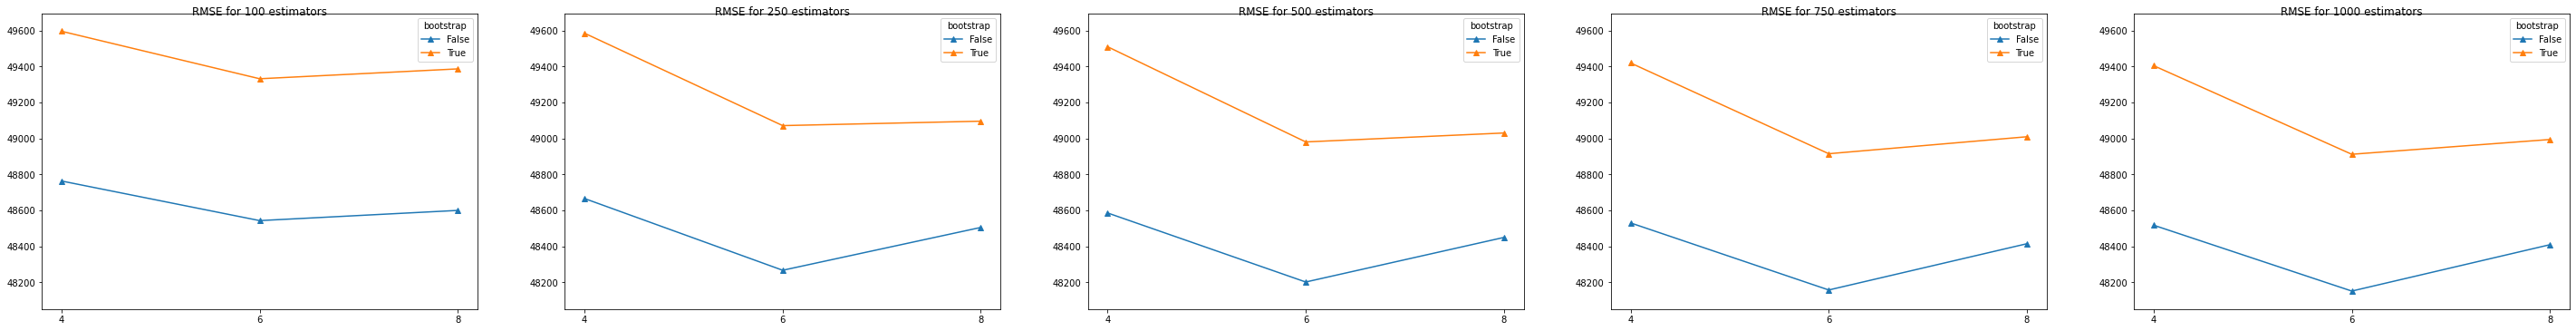

In [274]:
random_forest_hyperparameter_subplot(hyperparameter_df, 5)

In [275]:
print(f'Best estimator:\n{grid_search.best_estimator_}\n')
print(f'Best parameters:\n{grid_search.best_params_}\n')
print(f"Best RMSE score:\n{np.sqrt((-1) * grid_search.cv_results_['mean_test_score']).min()}\n")

Best estimator:
RandomForestRegressor(bootstrap=False, max_features=6, n_estimators=1000,
                      random_state=42)

Best parameters:
{'bootstrap': False, 'max_features': 6, 'n_estimators': 1000}

Best RMSE score:
48151.97651801956



The best results were obtained for the following combination:
  * n_estimators: 1000, total number of trees
  * max_features: 6, maximum number of features considered during split
  * bootstrap: False, means that the whole dataset is passed into each tree.

## Randomized Search
The *GridSearchCV* approach is fine in case of investigating relatively few combinations, like in the previous example. However if the hyperparameter search space is large, it is often preferable to use the *RandomizedSearchCV* instead. It's behaviour is pretty much similar to the *GridSearchCV*, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. 

The *RandomizedSearchCV* has 2 main advantages:
- throughout the N iterations of Randomized Search, N values will be explored within a specified range for each hyperparameter,
- it is computationally cheaper, since the N of iterations can be simply adjusted.

In [276]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint # to generate random int, considering the statistics

In [277]:
param_distributions = [
                  {'bootstrap': [True, False],
                   'n_estimators': randint(low=500, high=1000),
                   'max_features': randint(low=6, high=8),
                   }
]

fr_model = RandomForestRegressor(random_state=42)

randomized_search = RandomizedSearchCV(estimator=fr_model,
                                      param_distributions=param_distributions,
                                      n_iter=10,
                                      cv=5,
                                      scoring='neg_mean_squared_error',
                                      return_train_score=True,
                                      random_state=42) 

randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FF28027248>,
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FF28027E88>}],
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [278]:
cv_results = randomized_search.cv_results_
for mse, params in zip(cv_results['mean_test_score'], cv_results['params']):
    rmse = np.sqrt((-1) * mse)
    print(rmse, params)

48932.907315636905 {'bootstrap': True, 'max_features': 7, 'n_estimators': 848}
48936.64905468729 {'bootstrap': True, 'max_features': 6, 'n_estimators': 571}
48947.3430744118 {'bootstrap': True, 'max_features': 6, 'n_estimators': 602}
48181.42553807154 {'bootstrap': False, 'max_features': 6, 'n_estimators': 714}
48946.807340258085 {'bootstrap': True, 'max_features': 6, 'n_estimators': 587}
48928.31200137607 {'bootstrap': True, 'max_features': 7, 'n_estimators': 859}
48184.41471752921 {'bootstrap': False, 'max_features': 6, 'n_estimators': 649}
48932.691009211216 {'bootstrap': True, 'max_features': 7, 'n_estimators': 843}
48331.75858526548 {'bootstrap': False, 'max_features': 7, 'n_estimators': 793}
48309.51881599904 {'bootstrap': False, 'max_features': 7, 'n_estimators': 943}


## Best Model Analysis
The *best_estimator_.feature_importances_* attribute of the GridSearch will reutrn the relative importances of each attribute for making accurate predictions.

In [280]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.12459139e-02, 7.45290070e-02, 4.18858648e-02, 1.70246431e-02,
       1.58099872e-02, 1.68426045e-02, 1.55991995e-02, 3.23038365e-01,
       6.02774940e-02, 1.07654261e-01, 7.46379522e-02, 1.06823307e-02,
       1.52313349e-01, 7.10268785e-05, 3.42003205e-03, 4.96796833e-03])

In [282]:
sorted(zip(feature_importances, all_columns), reverse=True)

[(0.32303836545089104, 'median_income'),
 (0.1523133489824349, 'INLAND'),
 (0.10765426137812066, 'population_per_household'),
 (0.08124591385662357, 'longitude'),
 (0.07463795224085427, 'bedrooms_per_room'),
 (0.0745290070475871, 'latitude'),
 (0.06027749400766201, 'rooms_per_household'),
 (0.0418858647926287, 'housing_median_age'),
 (0.0170246430801847, 'total_rooms'),
 (0.016842604470958738, 'population'),
 (0.015809987174222228, 'total_bedrooms'),
 (0.015599199523404807, 'households'),
 (0.010682330733967188, '<1H OCEAN'),
 (0.004967968332904868, 'NEAR OCEAN'),
 (0.0034200320490977757, 'NEAR BAY'),
 (7.10268784573456e-05, 'ISLAND')]

After taking a look at importance of each feature, we may notice some lessuseful features:

  * Only 'INLAND' feature seem to be really important among all ocean_proximity columns.
  * Bedrooms, population and rooms per household are much more informative that the total numbers itself.
  
It is a key to look at specific errors that the system makes and try to understand why it makes them and what may be a solution to fix these issues:
   
   * adding extra features?
   * getting rid of uninformative features?
   * cleaning up the outliers?

In [285]:
final_model = grid_search.best_estimator_

test = strat_test_set.drop(['median_house_value', 'median_income_category'], axis=1)
y_test = strat_test_set['median_house_value'].copy() # very important to copy, just to make sure that any modification of y_test will not modify the original data

X_test = pd.DataFrame(
    data=full_pipeline.fit_transform(test),
    columns=all_columns,
)

y_pred_final = final_model.predict(X_test)

final_mse = mean_squared_error(y_true=y_test, y_pred=y_pred_final)
final_rmse = np.sqrt(final_mse)

print('RMSE for final Random Forest Regressor is {:.2f}$'.format(final_rmse))

RMSE for final Random Forest Regressor is 68927.06$


### Confidence Interval for the Test RMSE
I can compute a T-Score defined as the 95% confidence interval for the test RMSE.

In [286]:
from scipy import stats

In [288]:
confidence = 0.95
squared_errors = (y_pred_final - y_test) ** 2
mean = squared_errors.mean()

n = len(squared_errors)
np.sqrt(stats.t.interval(confidence, n - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([66904.60065616, 70891.85264545])

The 95% confidence interval (T-Score) can be also computed manually.

In [289]:
tscore = stats.t.ppf((1 + confidence) / 2, df=n - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(n)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(66904.60065615845, 70891.85264545066)

Alternatively, Z-Score can be used instead of a T-Score.

In [290]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(n)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(66905.20276277912, 70891.28439897066)